# EDA

The data source is from Kaggle: Instacart Market Baske Analysis. There were 5 csv files: aisles.csv, departments.csv, orders.csv, order_products__prior.csv, order_products__train.csv. In this notebook, we will analyzing the dataset.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset & Checking Duplicates and Nan Value 

In [13]:
# Looking at aisles
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
# check the shape
print(f'There are {aisles.shape[0]} rows and {aisles.shape[1]} columns in aisles.csv.')

There are 134 rows and 2 columns in aisles.csv.


In [3]:
# To check null value
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [6]:
# to check duplicates
print(f'It has {aisles.duplicated().sum()} duplicates.')
# data looks like it clean.

It has 0 duplicates.


In [14]:
# Looking at departments
dept = pd.read_csv('departments.csv')
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [21]:
dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [4]:
# check the shape
print(f'There are {dept.shape[0]} rows and {dept.shape[1]} columns in department.csv.')

There are 21 rows and 2 columns in department.csv.


In [22]:
# to check null value
dept.isna().sum()

department_id    0
department       0
dtype: int64

In [23]:
# check duplicates
print(f'It has {dept.duplicated().sum()} duplicates.')
# data looks clean

It has 0 duplicates.


In [15]:
products =  pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
# How many product id
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
# check shape
print(f'There are {products.shape[0]} rows and {products.shape[1]} columns in products.csv.')

There are 49688 rows and 4 columns in products.csv.


In [28]:
# check null values
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [13]:
# check duplicates
print(f'It has {products.duplicated().sum()} duplicates.')
# data looks clean

It has 0 duplicates.


In [8]:
# Looking at orders
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [20]:
print(f'There are {orders.order_id.nunique()} unique order_id.')
print(f'There are {orders.user_id.nunique()} unique user_id')
print(f'There are {orders.eval_set.nunique()} unique eval_set.')
print(f'They are {orders.eval_set.unique()}.')
print(f'There are {orders.order_number.nunique()} unique order_number.')

There are 3421083 unique order_id.
There are 206209 unique user_id
There are 3 unique eval_set.
They are ['prior' 'train' 'test'].
There are 100 unique order_number.


It seems every order row has different order_id. The order_number is the based on each customer, so the max order_number per customer is 100. Days_since_prior_order is also based on each customer, that is why every first time order it will be listed as 'NaN' in the days_since_prior_order. I will keep it as NaN just in case if I need it for later use.

In [15]:
# Check dtype
orders.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                3421083 non-null  int64  
 1   user_id                 3421083 non-null  int64  
 2   eval_set                3421083 non-null  object 
 3   order_number            3421083 non-null  int64  
 4   order_dow               3421083 non-null  int64  
 5   order_hour_of_day       3421083 non-null  int64  
 6   days_since_prior_order  3214874 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [9]:
# check shape
print(f'There are {orders.shape[0]} rows and {orders.shape[1]} columns in orders.csv.')

There are 3421083 rows and 7 columns in orders.csv.


In [34]:
# check null value
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

There are some missing values. As we can see above, there are NaN values in the days_since_prior_order for first time that the user order. 

In [21]:
# check duplicates
print(f'It has {orders.duplicated().sum()} duplicates.')

It has 0 duplicates.


In [10]:
# looking at order product prior
prior =  pd.read_csv('order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [19]:
prior.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Non-Null Count     Dtype
---  ------             --------------     -----
 0   order_id           32434489 non-null  int64
 1   product_id         32434489 non-null  int64
 2   add_to_cart_order  32434489 non-null  int64
 3   reordered          32434489 non-null  int64
dtypes: int64(4)
memory usage: 989.8 MB


In [11]:
# check the shape
print(f'There are {prior.shape[0]} rows and {prior.shape[1]} columns in order_products__prior.csv.')

There are 32434489 rows and 4 columns in order_products__prior.csv.


In [ ]:
# check the null values
prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [22]:
# check the duplicates
print(f'It has {prior.duplicated().sum()} duplicates.')
# Data looks clean

It has 0 duplicates.


In [12]:
# Looking at order products train
train = pd.read_csv('order_products__train.csv')
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [25]:
train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [13]:
# check shape 
print(f'There are {train.shape[0]} rows and {train.shape[1]} columns in order_products__train.csv.')

There are 1384617 rows and 4 columns in order_products__train.csv.


In [ ]:
# check null values
train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [27]:
# check duplicates
print(f'It has {train.duplicated().sum()} duplicates.')
# data looks clean

It has 0 duplicates.


In summary:
- aisles.csv contains aisles_id and aisle. 
- dept.csv contains department_id and department.
- products.csv contains product_id, product_name, aisle_id and department_id.
- orders.csv contains order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order. 
- order_products__prior.csv contains order_id, product_id, add_to_cart_order, reordered.
- order_products__train.csv contains order_id, product_id, add_to_cart_order, reordered.

## Merging Data

Since `train` and `prior` has the same columns, we are going to concatenate them. 

In [21]:
# concat 'train' and 'prior'
order_products = pd.concat((train, prior), axis = 0)

In [22]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Non-Null Count     Dtype
---  ------             --------------     -----
 0   order_id           33819106 non-null  int64
 1   product_id         33819106 non-null  int64
 2   add_to_cart_order  33819106 non-null  int64
 3   reordered          33819106 non-null  int64
dtypes: int64(4)
memory usage: 1.3 GB


In [30]:
# shape
print(f'There are {order_products.shape[0]} rows and {order_products.shape[1]} columns in order_products.')

There are 33819106 rows and 4 columns in order_products.


Now, we want to merge `orders` with `order_products`

In [23]:
data = pd.merge(orders, order_products, on='order_id', how='left')

Next, `data` is going to be merged with `products` to show the product's name.

In [31]:
# merging it with product name
data = pd.merge(data, products, on='product_id', how='left')

In [32]:
# merge with aisle
data = pd.merge(data, aisles, on='aisle_id', how='left')

In [33]:
# merge with dept
data= pd.merge(data, dept, on='department_id', how='left')

In [36]:
# save the merging of all together, index is False to avoid double index
data.to_csv('data.csv', index = False)

In [43]:
data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,paper goods,household


In [44]:
data.info(show_counts=True) # there are some null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33894106 entries, 0 to 33894105
Data columns (total 15 columns):
 #   Column                  Non-Null Count     Dtype  
---  ------                  --------------     -----  
 0   order_id                33894106 non-null  int64  
 1   user_id                 33894106 non-null  int64  
 2   eval_set                33894106 non-null  object 
 3   order_number            33894106 non-null  int64  
 4   order_dow               33894106 non-null  int64  
 5   order_hour_of_day       33894106 non-null  int64  
 6   days_since_prior_order  31816038 non-null  float64
 7   product_id              33819106 non-null  float64
 8   add_to_cart_order       33819106 non-null  float64
 9   reordered               33819106 non-null  float64
 10  product_name            33819106 non-null  object 
 11  aisle_id                33819106 non-null  float64
 12  department_id           33819106 non-null  float64
 13  aisle                   33819106 non-nul

In [42]:
data.isna().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                  75000
add_to_cart_order           75000
reordered                   75000
product_name                75000
aisle_id                    75000
department_id               75000
aisle                       75000
department                  75000
dtype: int64

In [40]:
# Check where are the null value for product_id
data[data['product_id'].isna()]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
384,2774568,3,test,13,5,15,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,329954,4,test,6,3,12,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,1528013,6,test,4,3,16,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1086,1376945,11,test,8,6,11,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1161,1356845,12,test,6,1,20,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33892542,2728930,206202,test,23,2,17,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33892729,350108,206204,test,5,4,14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33893066,1043943,206206,test,68,0,20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33893290,2821651,206207,test,17,2,13,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems all the test set has a null value in product_id, add_to_cart_order, reordered, product_name, aisle_id, department_id, aisle, department. In the Kaggle, the test set is used to test your model. So, I will drop the test set in the dataframe and I will use only the prior and train set. 

In [45]:
# Checking the unique type of eval_set
data['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

Prior is the data from customer prior history. Train is the data that Instacart suggested for training. Test is used for the competitor to fill in the null value. For this Capstone Project, I will not use the test set. And I will combine both prior and train in data. 

In [46]:
# Since we want to explore only the train and prior data, we make making another dataframe, 'df'
# by dropping the test set
df = data[data['eval_set'] != 'test']

In [47]:
# save to csv 
df.to_csv('df.csv', index = False)

In [48]:
# check df
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,paper goods,household


In [49]:
# check shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in df.')

There are 33819106 rows and 15 columns in df.


In [50]:
# check null values
df.isna().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64

In [51]:
# check duplicates
print(f'It has {df.duplicated().sum()} duplicates.')
# data looks clean

It has 0 duplicates.


In [52]:
# Meanwhile, the test set is save into a dataframe, 'test'
test = data[data['eval_set'] == 'test']

In [53]:
# save the test set
test.to_csv('test.csv', index = False)

In [54]:
# check the test
test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
384,2774568,3,test,13,5,15,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,329954,4,test,6,3,12,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,1528013,6,test,4,3,16,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1086,1376945,11,test,8,6,11,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1161,1356845,12,test,6,1,20,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# check shape of test
print(f'There are {test.shape[0]} rows and {test.shape[1]} columns in test.')

There are 75000 rows and 15 columns in test.


In [53]:
# check null values of test
test.isna().sum()

order_id                      0
user_id                       0
eval_set                      0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order        0
product_id                75000
add_to_cart_order         75000
reordered                 75000
product_name              75000
aisle_id                  75000
department_id             75000
aisle                     75000
department                75000
dtype: int64

In [54]:
# check duplicates os test
print(f'It has {test.duplicated().sum()} duplicates.')

It has 0 duplicates.


## Exploratory Data Analysis

In [2]:
# Read data from prior and train set
df = pd.read_csv('df.csv')

### What aisle is the best selling?

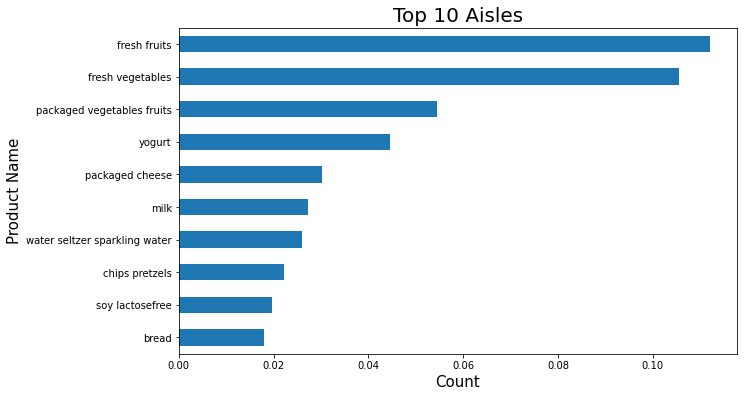

In [73]:
# plotting top 10 products
plt.figure(figsize=(10,6))
df['aisle'].value_counts(normalize=True)[:10].sort_values().plot(kind='barh')
plt.title('Top 10 Aisles', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('Product Name', size=15)
plt.show()

The top 10 aisles are fresh fruits, fresh vegetables, packaged vegetables fruits, yogurt, packaged cheese, milk, water seltzer sparkling water, chips pretzels, soy lactosefree, and bread. The customers seem to order from fresh fruits and fresh vegetables aisles more often than other products. <br />

### What department is best selling?

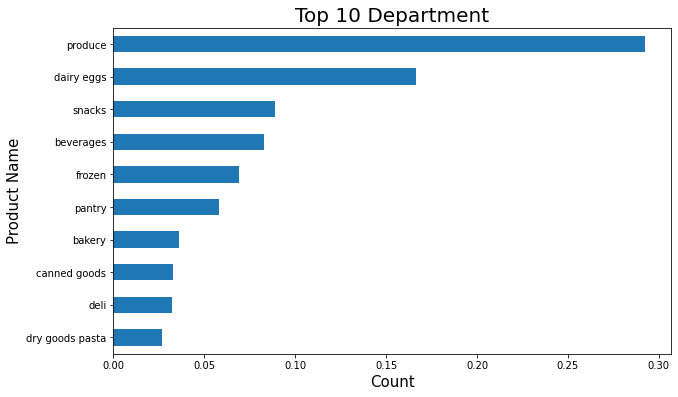

In [75]:
# plotting top 10 products
plt.figure(figsize=(10,6))
df['department'].value_counts(normalize=True)[:10].sort_values().plot(kind='barh')
plt.title('Top 10 Department', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('Product Name', size=15)
plt.show()

The top 10 departments are produce, dairy eggs, snacks, beverages, frozen, pantry, bakery, canned goods, deli, and dry goods pasta. Looking at the chart, the customers order the most from the produce department.

### What products are the best selling?

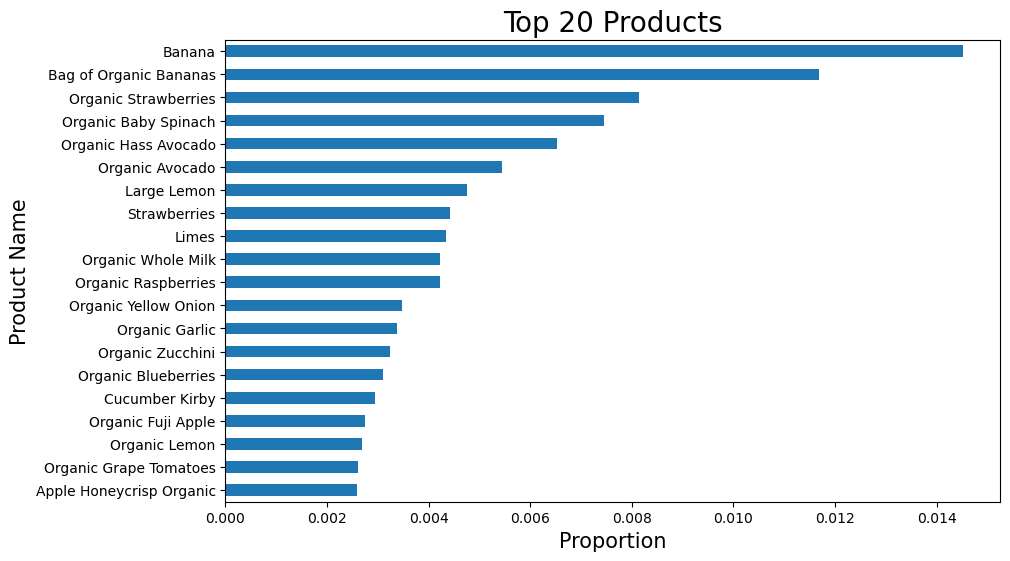

In [11]:
# plotting top 20 products
plt.figure(figsize=(10,6))
df['product_name'].value_counts(normalize=True)[:20].sort_values().plot(kind='barh')
plt.title('Top 20 Products', size=20)
plt.xlabel('Proportion', size=15)
plt.ylabel('Product Name', size=15)
plt.show()

Fruits and vegetables, especially the organic one, are the most ordered products.

### Product & Department & Aisle

Now, we want to know at how many products per department.

In [16]:
# merge product with department 
prod_dept = pd.merge(products, dept, on='department_id', how='left')
# merge with aisle
prod_dept_ais = pd.merge(prod_dept, aisles, on='aisle_id', how='left')
prod_dept_ais.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [17]:
# product & department
prod_per_dept = prod_dept_ais[['product_id', 'department']].groupby('department')['product_id'].count().reset_index()
prod_per_dept.columns = ['department', 'product_count']
prod_per_dept.sort_values(by='product_count', ascending=False).head()

,department,product_count
17,personal care,6563
20,snacks,6264
16,pantry,5371
3,beverages,4365
10,frozen,4007


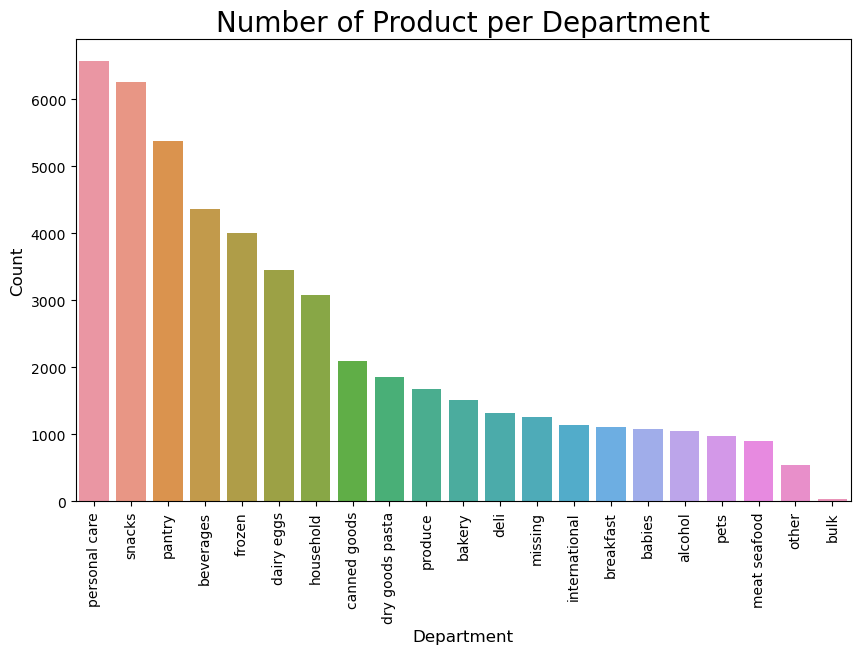

In [18]:
# plot
plt.figure(figsize=(10,6))
sns.barplot(x = 'department', y= 'product_count', data=prod_per_dept.sort_values(by='product_count', ascending=False))
plt.title('Number of Product per Department', size=20)
plt.xlabel('Department', size=12)
plt.ylabel('Count', size=12)
plt.xticks(rotation=90)
plt.show()

Personal care department has the most number of product compare to other department. Although produce department is the most favorite department, it does not have as many products as personal care department. In the chart, there is a department called 'missing'.

In [18]:
# checking what products are in missing department
prod_dept[prod_dept['department'] == 'missing']

,product_id,product_name,aisle_id,department_id,department
37,38,Ultra Antibacterial Dish Liquid,100,21,missing
71,72,Organic Honeycrisp Apples,100,21,missing
109,110,Uncured Turkey Bologna,100,21,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing
...,...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21,missing
49574,49575,Chocolate Vanilla Malt Custard,100,21,missing
49640,49641,"8\"" Pecan Pie",100,21,missing
49663,49664,Lemon Cayenne Drinking Vinegar,100,21,missing


There are 1258 products under 'missing' department and they are a variety of products that should be under different department. 

Now, we chek if the aisle section has 'missing' aisle.

In [19]:
# product & aisles
prod_per_ais = prod_dept_ais[['product_id', 'aisle']].groupby('aisle')['product_id'].count().reset_index()
prod_per_ais.columns = ['aisle', 'product_count']
prod_per_ais.sort_values(by='product_count', ascending=False).head()

,aisle,product_count
85,missing,1258
18,candy chocolate,1246
71,ice cream ice,1091
130,vitamins supplements,1038
133,yogurt,1026


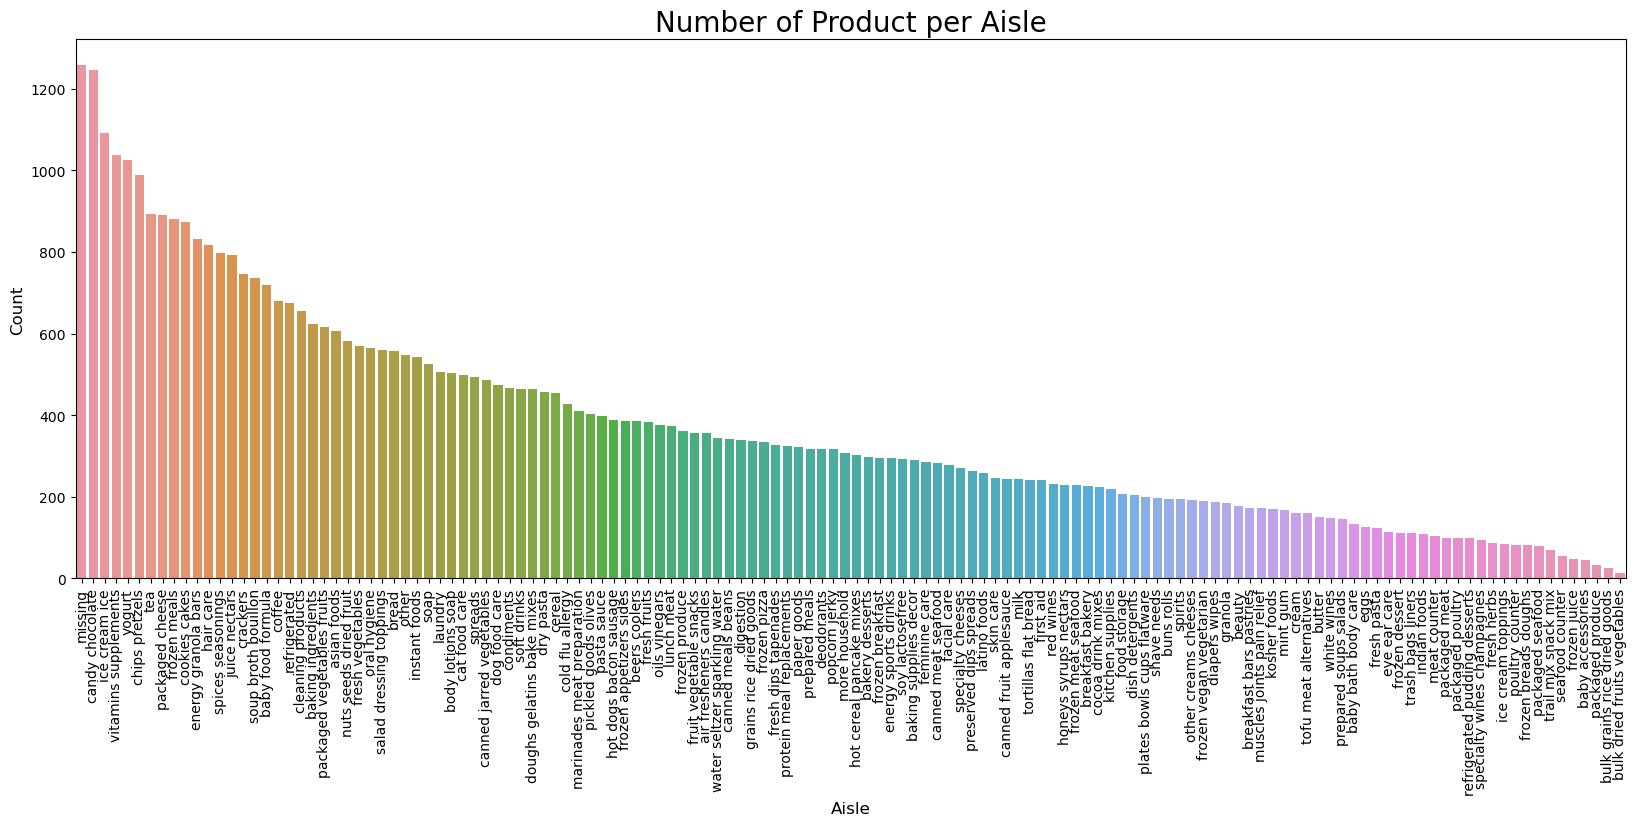

In [20]:
# plot
plt.figure(figsize=(20,7))
sns.barplot(x = 'aisle', y= 'product_count', data=prod_per_ais.sort_values(by='product_count', ascending=False))
plt.title('Number of Product per Aisle', size=20)
plt.xlabel('Aisle', size=12)
plt.ylabel('Count', size=12)
plt.xticks(rotation=90)
plt.show()

There is also an aisle called 'missing' which has the highest number of products type. If we ignore the missing aisle, the favourite aisle would be candy chocolate.

In [21]:
# Check how many aisle is 'missing'
prod_dept_ais[prod_dept_ais['aisle'] == 'missing']

,product_id,product_name,aisle_id,department_id,department,aisle
37,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
71,72,Organic Honeycrisp Apples,100,21,missing,missing
109,110,Uncured Turkey Bologna,100,21,missing,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21,missing,missing
49574,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
49640,49641,"8\"" Pecan Pie",100,21,missing,missing
49663,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


In [63]:
# checking how many aisle id in missing aisle
prod_dept_ais[prod_dept_ais['aisle'] == 'missing'].aisle_id.unique()

array([100])

In [64]:
# checking how many department id in missing department
prod_dept_ais[prod_dept_ais['department'] == 'missing'].department_id.unique()

array([21])

In [69]:
# checking how many product id in missing department
prod_dept_ais[prod_dept_ais['department'] == 'missing'].product_id.unique()

array([   38,    72,   110, ..., 49641, 49664, 49669])

In the data, there are 1258 products that have aisles and departments named 'missing'. The aisle_id is 100 and the department_id is 21. The products are a variety of products that should be under different departments and aisles. However, since I am going to do recommendation based on the product, not department nor aisle, I will leave it as it is. Note that the product_id is attached to the product_name. 

### Orders

In [91]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


We are going to use the merge data (df) to analyzed order_dow, order_hour_of_day, and days_since_prior_order.

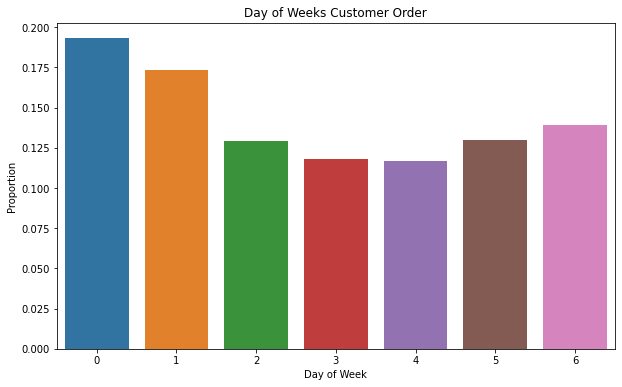

In [90]:
# what day of the week do the customers usually order?
# plot
plt.figure(figsize=(10,6))
sns.barplot(x=df.order_dow.value_counts(normalize=True).index, 
            y=df.order_dow.value_counts(normalize=True))
plt.title('Day of Weeks Customer Order')
plt.xlabel('Day of Week')
plt.ylabel('Proportion')
plt.show()

Most customer seems to order on week 0-1.

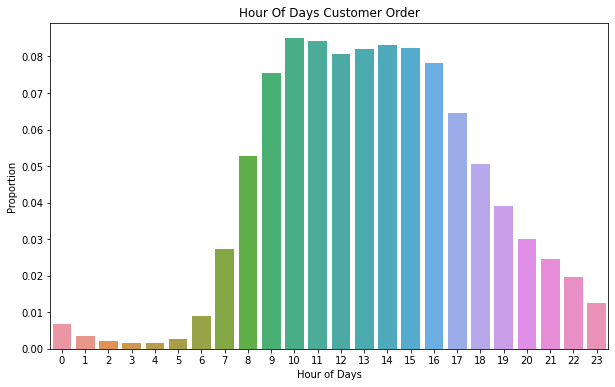

In [93]:
# what hour of day do the customers usually order?
plt.figure(figsize=(10,6))
sns.barplot(x = df['order_hour_of_day'].value_counts(normalize=True).index, 
            y = df['order_hour_of_day'].value_counts(normalize=True))
plt.title('Hour Of Days Customer Order')
plt.xlabel('Hour of Days')
plt.ylabel('Proportion')
plt.show()

Most costumers seems to order at 10 am - 16 pm.

How many days does user order since last order?

In [9]:
days = df[['user_id', 'days_since_prior_order']].groupby('user_id').days_since_prior_order.unique().reset_index()
days.head()

,user_id,days_since_prior_order
0,1,"[nan, 15.0, 21.0, 29.0, 28.0, 19.0, 20.0, 14.0..."
1,2,"[nan, 10.0, 3.0, 8.0, 13.0, 14.0, 27.0, 6.0, 3..."
2,3,"[nan, 9.0, 21.0, 20.0, 12.0, 7.0, 17.0, 11.0, ..."
3,4,"[nan, 19.0, 21.0, 15.0, 0.0]"
4,5,"[nan, 11.0, 10.0, 19.0, 6.0]"


In [85]:
days_between = df['days_since_prior_order'].value_counts(normalize=True).reset_index()
days_between.columns = ['days_since_prior_order', 'proportion']
days_between.head()

,days_since_prior_order,proportion
0,7.0,0.112986
1,30.0,0.109553
2,6.0,0.081663
3,5.0,0.068698
4,4.0,0.066989


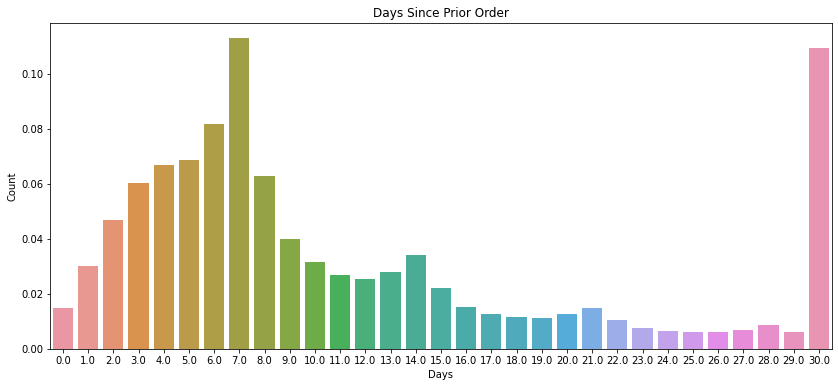

In [86]:
# how many days since last order?
plt.figure(figsize=(14,6))
sns.barplot(x='days_since_prior_order', y = 'proportion', data=days_between)
plt.title('Days Since Prior Order')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

It seems the longest day since prior order is 30 days. I think for order more than 30+ days, it is marked as 30 days. That is why the count for 30 days is very high.
On the other hand, there are some customers that order more once in a day(0 days). 
Overall, customers order within 7 days. <br /><p>

### Reordered

In [3]:
# what is inside reordered column?
df.reordered.value_counts()     
# it is only 0 and 1

1.0    19955360
0.0    13863746
Name: reordered, dtype: int64

What product are reordered the most?

In [5]:
# top 20 product being reordered
top_20_reordered = df.groupby('product_name').reordered.sum().reset_index()
top_20_reordered.columns = ['product_name', 'number_of_reordered']
top_20_reordered = top_20_reordered.sort_values('number_of_reordered', ascending=False).head(20)

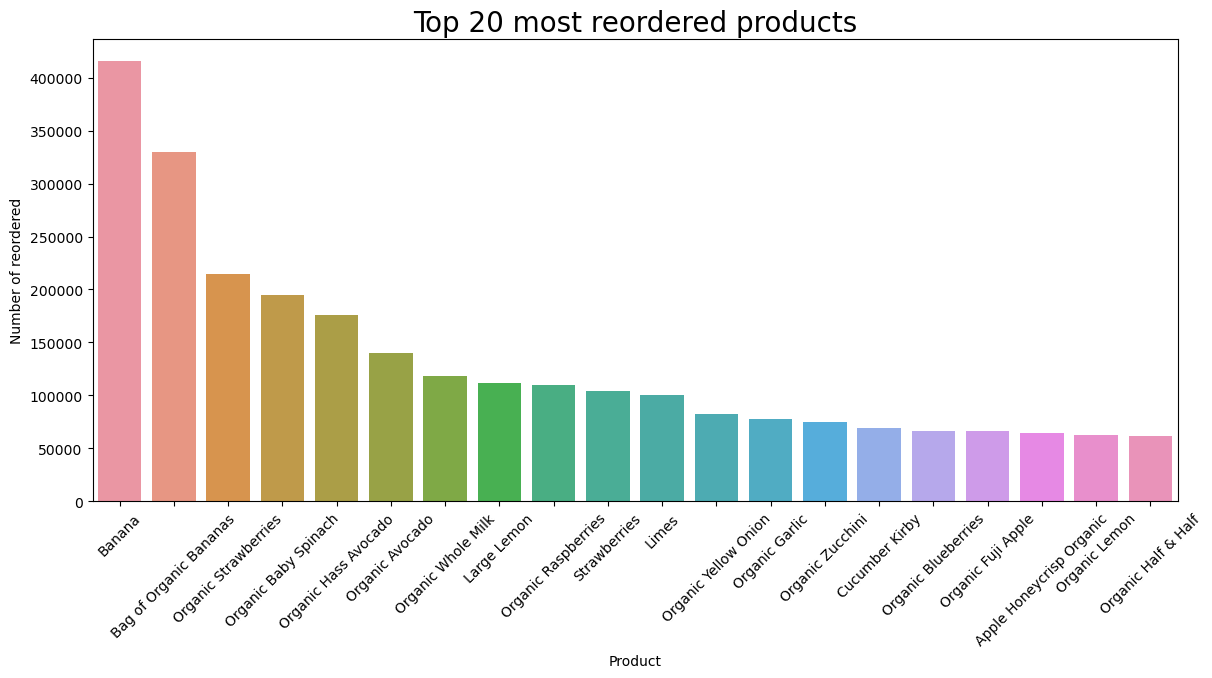

In [6]:
# plot top 20 reordered
plt.figure(figsize=(14,6))
sns.barplot(x='product_name', y = 'number_of_reordered', data=top_20_reordered)
plt.title('Top 20 most reordered products', size=20)
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.ylabel('Number of reordered')
plt.show()

Fruits and vegetables, especially the organic, are reordered the most. 

What department are the most reordered?

In [3]:
# top 10 department being reordered
top_10_dep_reordered = df.groupby('department').reordered.sum().reset_index()
top_10_dep_reordered.columns = ['department', 'number_of_reordered']
top_10_dep_reordered = top_10_dep_reordered.sort_values('number_of_reordered', ascending=False).head(10)

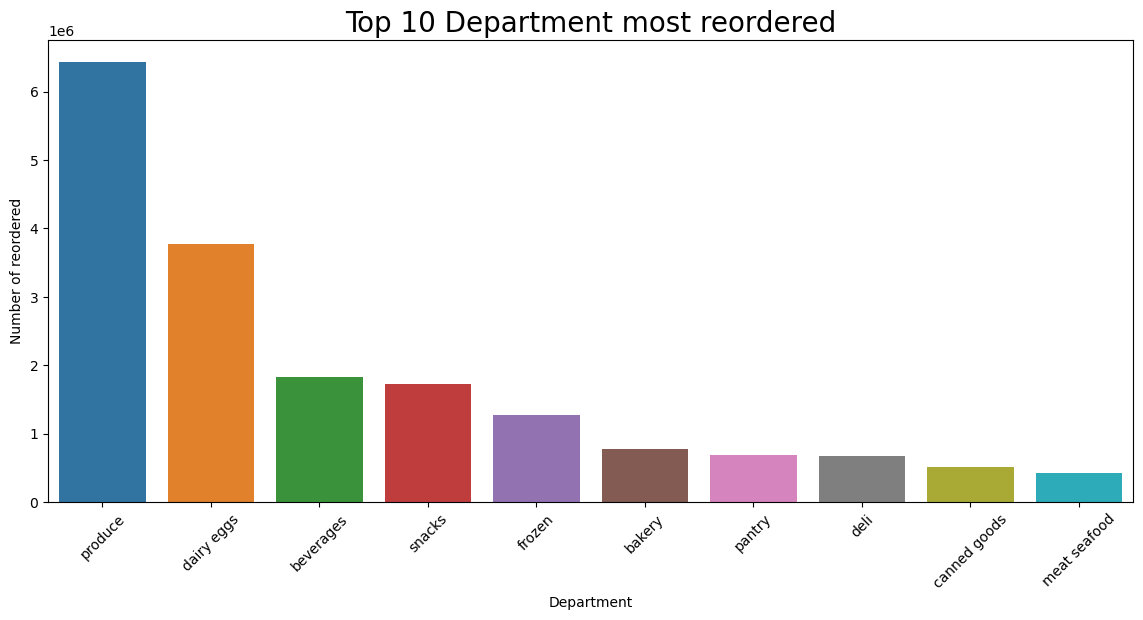

In [7]:
# plot top 10 reordered
plt.figure(figsize=(14,6))
sns.barplot(x='department', y = 'number_of_reordered', data=top_10_dep_reordered)
plt.title('Top 10 Department most reordered', size=20)
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylabel('Number of reordered')
plt.show()

Produce department has the most reordered compare to others.

Most reordered departments are produce.

What day of week does the customer like to buy from produce department?

In [61]:
produce_dow = df[df['department'] == 'produce'].groupby('order_dow').size().reset_index(name = 'sum')
produce_dow['normalize_sum'] = produce_dow['sum'].div(produce_dow['sum'].sum())
produce_dow

,order_dow,sum,normalize_sum
0,0,2057869,0.208110
1,1,1746944,0.176666
2,2,1244389,0.125844
3,3,1111911,0.112446
4,4,1095847,0.110822
5,5,1231232,0.124513
6,6,1400186,0.141599


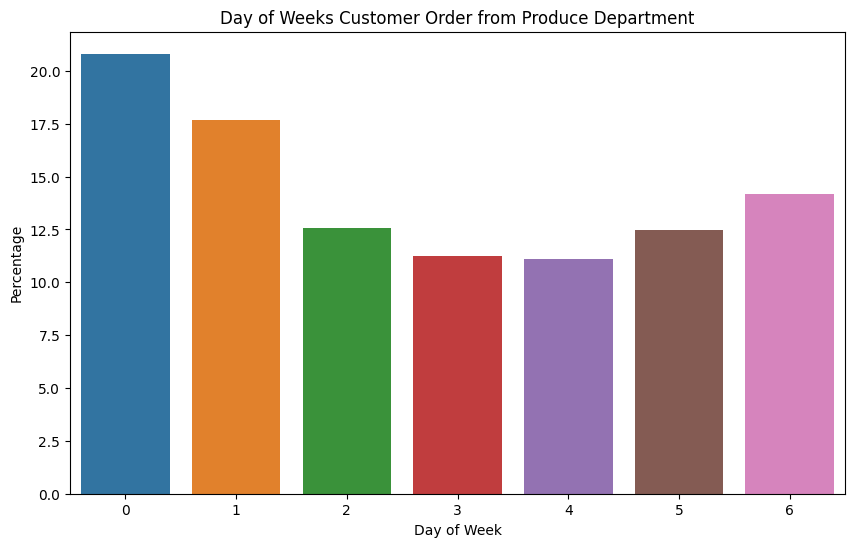

In [64]:
# what day of the week do the customers usually order produce?
# plot
plt.figure(figsize=(10,6))
sns.barplot(x=produce_dow.order_dow,
            y=produce_dow.normalize_sum *100)
plt.title('Day of Weeks Customer Order from Produce Department')
plt.xlabel('Day of Week')
plt.ylabel('Percentage')
plt.show()

Seems like the customer like to order on day of week 0-1 from produce Department.

What day of week does the customer like to buy from dairy egg department?

In [65]:
dairy_dow = df[df['department'] == 'dairy eggs'].groupby('order_dow').size().reset_index(name = 'sum')
dairy_dow['normalize_sum'] = dairy_dow['sum'].div(dairy_dow['sum'].sum())
dairy_dow

,order_dow,sum,normalize_sum
0,0,1070923,0.190181
1,1,989872,0.175788
2,2,733935,0.130337
3,3,665526,0.118188
4,4,660577,0.117309
5,5,740339,0.131474
6,6,769895,0.136723


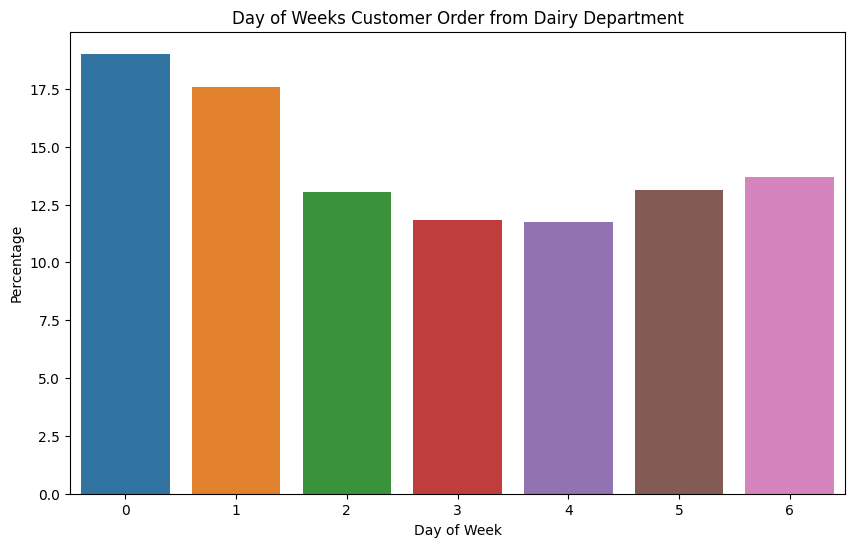

In [66]:
# what day of the week do the customers usually order dairy?
# plot
plt.figure(figsize=(10,6))
sns.barplot(x=dairy_dow.order_dow,
            y=dairy_dow.normalize_sum *100)
plt.title('Day of Weeks Customer Order from Dairy Department')
plt.xlabel('Day of Week')
plt.ylabel('Percentage')
plt.show()

The customer also like to order on day of week 0-1 from dairy eggs Department.

What hours does the customer bought from produce department?

In [68]:
produce_hour = df[df['department'] == 'produce'].groupby('order_hour_of_day').size().reset_index(name = 'sum')
produce_hour['normalize_sum'] = produce_hour['sum'].div(produce_hour['sum'].sum())

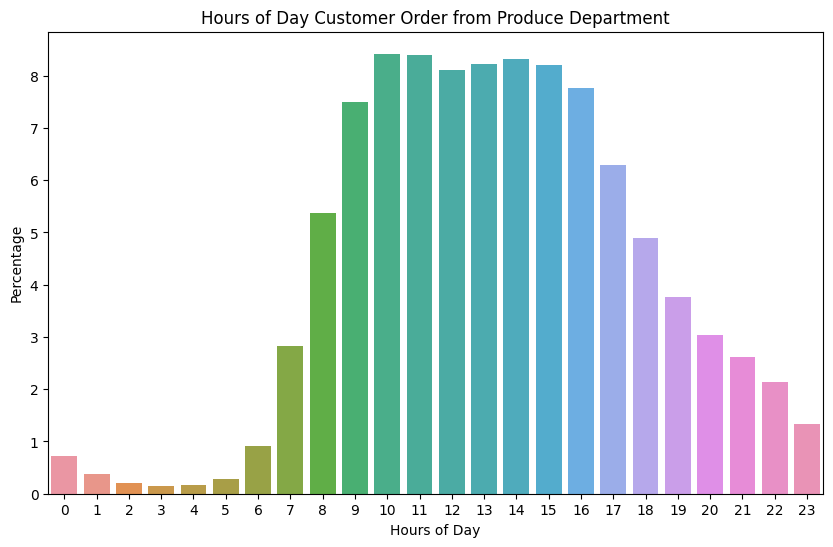

In [70]:
# plot
plt.figure(figsize=(10,6))
sns.barplot(x=produce_hour.order_hour_of_day,
            y=produce_hour.normalize_sum *100)
plt.title('Hours of Day Customer Order from Produce Department')
plt.xlabel('Hours of Day')
plt.ylabel('Percentage')
plt.show()

Customers order from produce department around 10 am - 3 pm.

What hours does the customer bought from dairy department?

In [71]:
dairy_hour = df[df['department'] == 'dairy eggs'].groupby('order_hour_of_day').size().reset_index(name = 'sum')
dairy_hour['normalize_sum'] = dairy_hour['sum'].div(dairy_hour['sum'].sum())

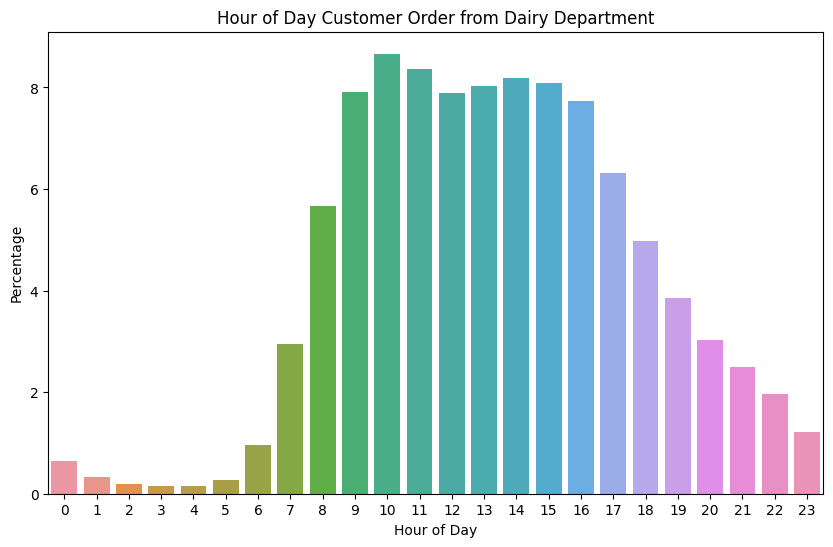

In [74]:
# what day of the week do the customers usually order dairy?
# plot
plt.figure(figsize=(10,6))
sns.barplot(x=dairy_hour.order_hour_of_day,
            y=dairy_hour.normalize_sum *100)
plt.title('Hour of Day Customer Order from Dairy Department')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage')
plt.show()

The customer likes to buy from produce and dairy eggs department around the same time.

What aisle has the most reordered number?

In [8]:
# top 10 aisles being reordered
top_10_aisle_reordered = df.groupby('aisle').reordered.sum().reset_index()
top_10_aisle_reordered.columns = ['aisle', 'number_of_reordered']
top_10_aisle_reordered = top_10_aisle_reordered.sort_values('number_of_reordered', ascending=False).head(10)

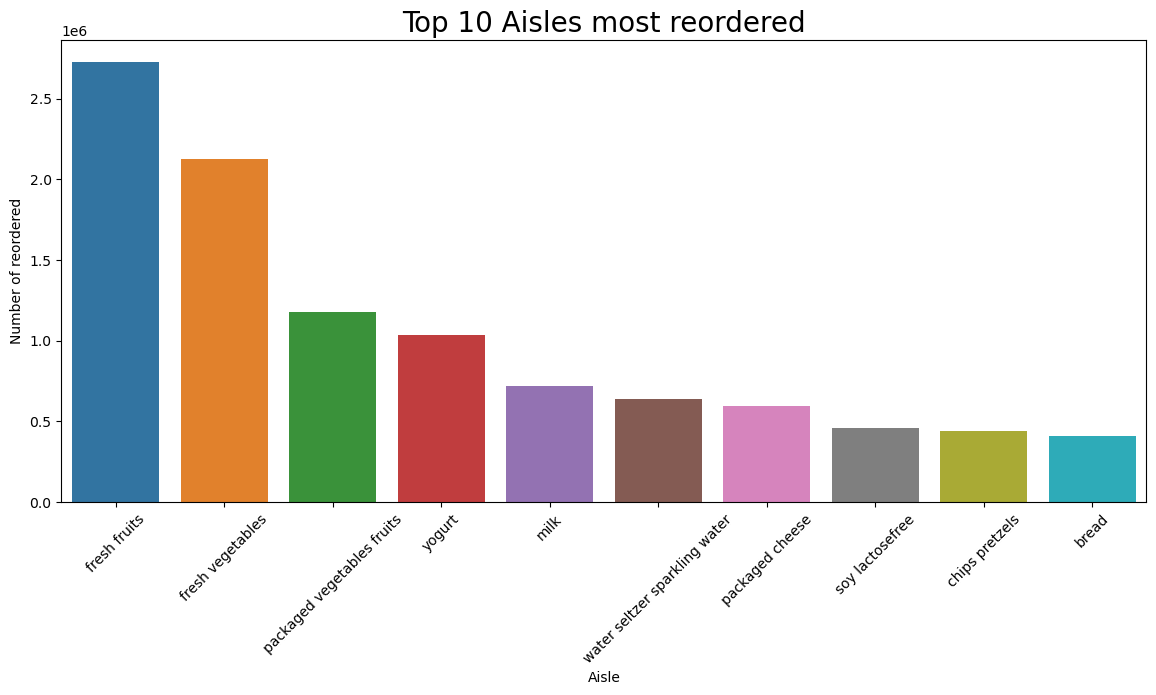

In [10]:
# plot top 10 reordered
plt.figure(figsize=(14,6))
sns.barplot(x='aisle', y = 'number_of_reordered', data=top_10_aisle_reordered)
plt.title('Top 10 Aisles most reordered', size=20)
plt.xlabel('Aisle')
plt.xticks(rotation=45)
plt.ylabel('Number of reordered')
plt.show()

Fresh fruits aisle is the most reordered aisle.

What department has the highest reordered when days since prior order are 7 days?

In [23]:
days7 = df[df['days_since_prior_order']== 7].groupby('department').reordered.sum().reset_index()
days7.columns = ['department', 'number_of_reordered']
days7 = days7.sort_values('number_of_reordered', ascending=False).head(10)

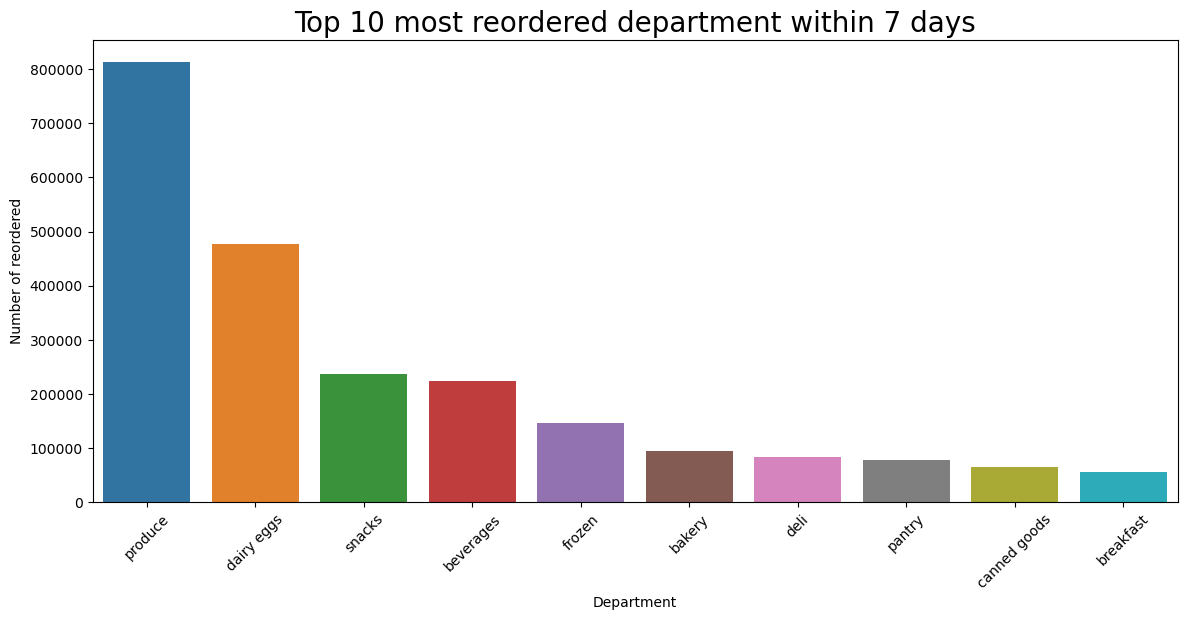

In [24]:
# plot top 10 reordered
plt.figure(figsize=(14,6))
sns.barplot(x='department', y = 'number_of_reordered', data=days7)
plt.title('Top 10 most reordered department within 7 days', size=20)
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylabel('Number of reordered')
plt.show()

What department has the highest reordered when days since prior order are 30 days?

In [21]:
days30 = df[df['days_since_prior_order']== 30].groupby('department').reordered.sum().reset_index()
days30.columns = ['department', 'number_of_reordered']
days30 = days30.sort_values('number_of_reordered', ascending=False).head(10)

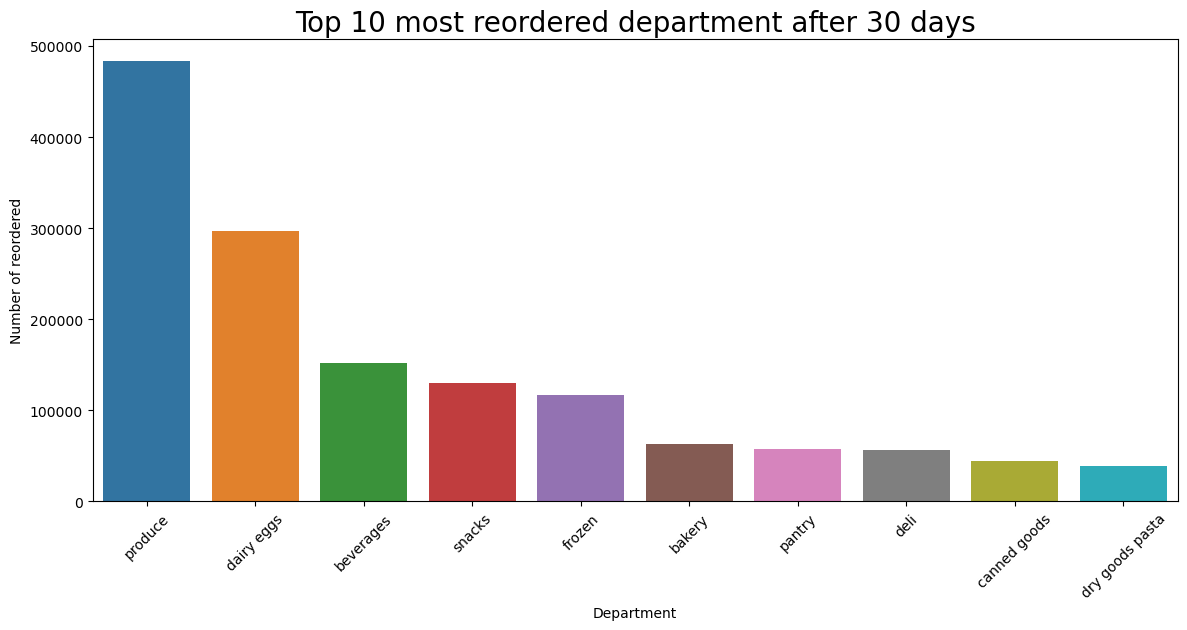

In [22]:
# plot top 10 reordered
plt.figure(figsize=(14,6))
sns.barplot(x='department', y = 'number_of_reordered', data=days30)
plt.title('Top 10 most reordered department after 30 days', size=20)
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylabel('Number of reordered')
plt.show()

### Users
Now, we want to know how many user id in total and how many days in between do customer order.

In [75]:
# how many user id
df['user_id'].nunique()

206209

There are 206,209 unique user_id.

In [77]:
# how many did the user order at one time?
order_size = df.groupby(['user_id', 'order_number']).size().reset_index()
# rename the columns
order_size.columns = ['user_id', 'order_number', 'amount']
order_size.head()

,user_id,order_number,amount
0,1,1,5
1,1,2,6
2,1,3,5
3,1,4,5
4,1,5,8


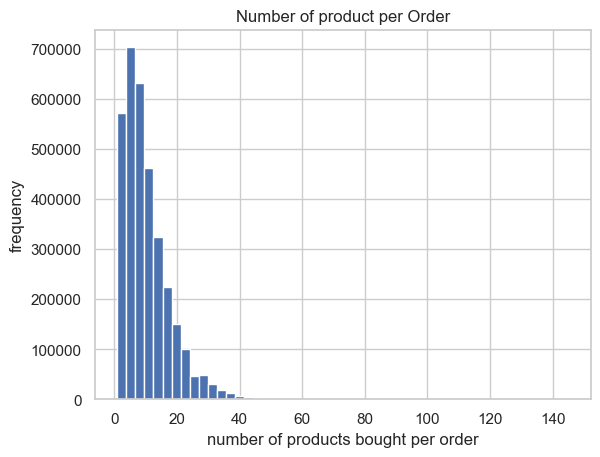

In [99]:
plt.figure()
sns.set(style='whitegrid')
plt.hist(order_size['amount'], bins=50)
plt.xlabel('number of products bought per order')
plt.ylabel('frequency')
plt.title('Number of product per Order')
plt.show()

In [89]:
order_size['amount'].describe()

count    3.346083e+06
mean     1.010707e+01
std      7.542326e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.400000e+01
max      1.450000e+02
Name: amount, dtype: float64

In [117]:
# looking at 90, 95, 99 percentile
for n in [90, 95, 99]:
    print('{} percentile has {} items'.format(n, np.percentile(order_size['amount'], n)))

90 percentile has 20.0 items
95 percentile has 25.0 items
99 percentile has 35.0 items


Minimum products per order is 1 and maximum products per order is 145. The median number of products per order is 8. The graph is right skewed and 90% of orders has around 20 products per order. 

In [78]:
# how many order_number per customer?
user_order = df.groupby('user_id').order_number.nunique().reset_index().sort_values(by='order_number', ascending = False)
user_order.columns = ['user_id', 'total_order']
user_order.head()
# the max total_order per customer is 100

,user_id,total_order
112840,112841,100
174554,174555,100
73675,73676,100
176468,176469,100
90583,90584,100


<Figure size 2000x500 with 0 Axes>

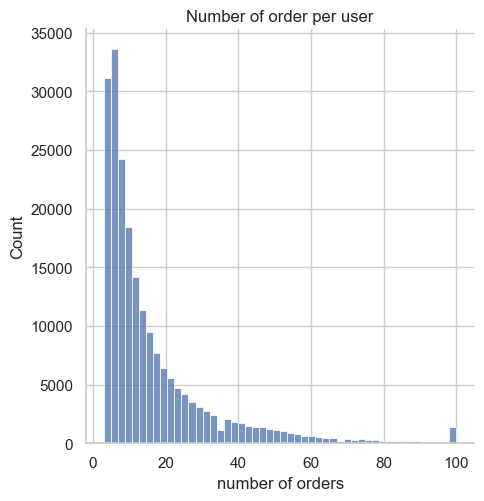

In [108]:
plt.figure(figsize=(20,5))
sns.set(style='whitegrid')
sns.displot(user_order['total_order'], bins=50)
plt.xlabel('number of orders')
plt.title('Number of order per user')
sns.despine()
plt.show()

In [85]:
user_order['total_order'].describe()

count    206209.000000
mean         16.226658
std          16.662238
min           3.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: total_order, dtype: float64

The graph is right skewed. Minimum number of order is 3 and maximum number of order is 100. 50% of customers has around 10 order number. 

In [106]:
# Unique products ordered by users
unique_product = df.groupby('user_id')['product_id'].nunique().reset_index(name='total_unique_product')

<Figure size 2000x500 with 0 Axes>

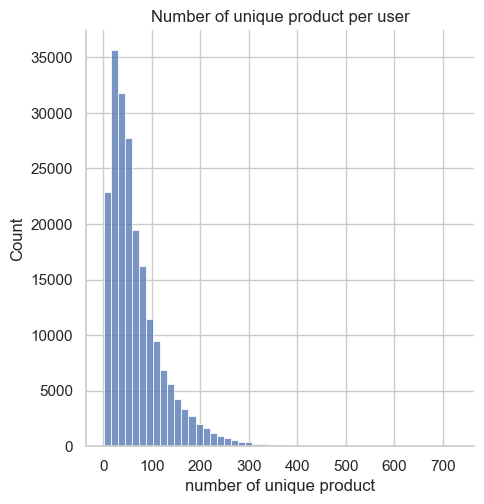

In [114]:
plt.figure(figsize=(20,5))
sns.set(style='whitegrid')
sns.displot(unique_product['total_unique_product'], bins=50)
plt.xlabel('number of unique product')
plt.title('Number of unique product per user')
sns.despine()
plt.show()

In [115]:
unique_product.describe()

,user_id,total_unique_product
count,206209.000000,206209.000000
mean,103105.000000,67.231527
std,59527.555167,56.876842
min,1.000000,1.000000
25%,51553.000000,28.000000
50%,103105.000000,51.000000
75%,154657.000000,89.000000
max,206209.000000,728.000000


Again, the graph is right skewed. 50% of users order around 51 unique products.

In [10]:
# to know how many times a user_id buy a certain product_id during the whole transaction.
total_product_count = df.groupby(['user_id', 'product_id']).size().reset_index()
# to rename the columns 
total_product_count.columns = ['user_id', 'product_id', 'count']
total_product_count.head()

,user_id,product_id,count
0,1,196.0,11
1,1,10258.0,10
2,1,10326.0,1
3,1,12427.0,10
4,1,13032.0,4


In [ ]:
# how many count for each count?
total_product_count['count'].value_counts().sort_values()

98           2
100          3
99           4
97           4
94           5
        ...   
5       384418
4       612369
3      1074345
2      2296606
1      8299266
Name: count, Length: 100, dtype: int64

There is a high number of customer orders an item only 1 time. A customer might be buying an item only one time in the entire orders might due to a customer is trying new things and they don't like it, or a customer substituting a product that is not available. On the other hand, the customer that buy more than 50 times in the entire orders might be due to a regular consumption.